<a href="https://colab.research.google.com/github/JamesCFabrianes/Google-Collab-Python-/blob/main/B64_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes_df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv",
                          header = None)

diabetes_df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_df.columns = ["Num of Times Pregnant",
                       "Plasma Glucose",
                       "Diastolic blood Pressure",
                       "Triceps skinfold thickness",
                       "2-Hour serum insulin",
                       "BMI",
                       "Diabetes Pedigree Function",
                       "Age",
                       "Class"]

In [ ]:
diabetes_df.head()

,Num of Times Pregnant,Plasma Glucose,Diastolic blood Pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes Pedigree Function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Mengubah nilai data yang 0 menjadi NA
diabetes_df[diabetes_df.columns[:8]] = diabetes_df[diabetes_df.columns[:8]].replace(0, np.nan)

In [ ]:
diabetes_df.isnull().sum() # Menghitung julmah data NA

Num of Times Pregnant         111
Plasma Glucose                  5
Diastolic blood Pressure       35
Triceps skinfold thickness    227
2-Hour serum insulin          374
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Class                           0
dtype: int64

In [ ]:
diabetes_df.head()

,Num of Times Pregnant,Plasma Glucose,Diastolic blood Pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes Pedigree Function,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Imputation for Missing Data

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#Mean
mean_imputer = SimpleImputer(missing_values = np.nan, strategy="mean")

#Median
median_imputer = SimpleImputer(missing_values = np.nan, strategy="median")

#Mode
most_frequent = SimpleImputer(missing_values = np.nan, strategy="most_frequent")

## Imputation by column

In [ ]:
diabetes_df["Class"].unique()

array([1, 0])

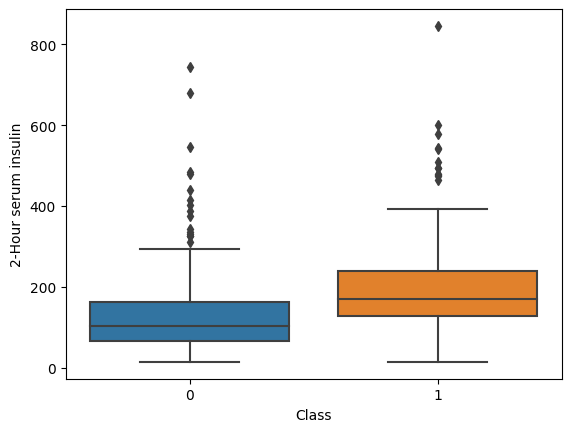

In [ ]:
ax = sns.boxplot(y = diabetes_df["2-Hour serum insulin"],
                 x = diabetes_df["Class"])

In [ ]:
insulin_imputer = SimpleImputer(missing_values = np.nan, strategy="median")
insulin_imputer = insulin_imputer.fit(diabetes_df[["2-Hour serum insulin"]])

diabetes_df["2-Hour serum insulin"] = insulin_imputer.transform(diabetes_df[["2-Hour serum insulin"]])

## Imputation All

In [ ]:
X = diabetes_df.iloc[:, :8].values
y = diabetes_df["Class"].values

X = median_imputer.fit_transform(X)

In [ ]:
diabetes_df.head(3)

,Num of Times Pregnant,Plasma Glucose,Diastolic blood Pressure,Triceps skinfold thickness,2-Hour serum insulin,BMI,Diabetes Pedigree Function,Age,Class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,125.0,23.3,0.672,32,1


In [ ]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# Imbalance Data Handling

In [ ]:
df = pd.read_csv("/content/stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
df["stroke"].value_counts() / df.shape[0]

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
df = df.drop(["id", "gender", "ever_married", "work_type", "Residence_type", "smoking_status"], axis = 1)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999,  inplace=True)

## Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
X = df.iloc[:, :-1].values
y = df["stroke"].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
undersampler = RandomUnderSampler()
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state = 42,
              sampling_strategy = "minority")

# Sampling Strategy = menentukan kelas mana yang akan diperbanyak

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 2023)

X_train, y_train = smote.fit_resample(X_train, y_train)

# Categorical Encoding

## Label Encoding

In [ ]:
rating = ["Kecewa", "Tidak Puas", "Biasa saja", "Puas", "Mantap"]
rating_df = pd.DataFrame(rating, columns = ["Rating"])

rating_df

,Rating
0,Kecewa
1,Tidak Puas
2,Biasa saja
3,Puas
4,Mantap


In [ ]:
def penilaian(nilai):
    list_rating = ["Kecewa", "Tidak Puas", "Biasa saja", "Puas", "Mantap"]
    return list_rating.index(nilai) + 1

In [ ]:
rating_df["Rating Nilai"] = rating_df["Rating"].apply(penilaian)
rating_df

,Rating,Rating Nilai
0,Kecewa,1
1,Tidak Puas,2
2,Biasa saja,3
3,Puas,4
4,Mantap,5


## One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

kota = ["Jakarta", "Bandung", "Denpasar", "Surabaya", "Bandung", "Denpasar", "Jakarta"]
kota_df = pd.DataFrame(kota, columns = ["City"])
kota_df

,City
0,Jakarta
1,Bandung
2,Denpasar
3,Surabaya
4,Bandung
5,Denpasar
6,Jakarta


In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore")
ohe_df = pd.DataFrame(ohe.fit_transform(kota_df[["City"]]).toarray())
completed_df = kota_df.join(ohe_df)
completed_df.columns = ["City", "City_Bandung", "City_Denpasar", "City_Jakarta", "City_Surabaya"]
completed_df

,City,City_Bandung,City_Denpasar,City_Jakarta,City_Surabaya
0,Jakarta,0.0,0.0,1.0,0.0
1,Bandung,1.0,0.0,0.0,0.0
2,Denpasar,0.0,1.0,0.0,0.0
3,Surabaya,0.0,0.0,0.0,1.0
4,Bandung,1.0,0.0,0.0,0.0
5,Denpasar,0.0,1.0,0.0,0.0
6,Jakarta,0.0,0.0,1.0,0.0


In [ ]:
ohe_dummy_df = pd.get_dummies(kota_df, columns = ["City"], prefix="KOTA")
merger = kota_df.join(ohe_dummy_df)
merger

,City,KOTA_Bandung,KOTA_Denpasar,KOTA_Jakarta,KOTA_Surabaya
0,Jakarta,0,0,1,0
1,Bandung,1,0,0,0
2,Denpasar,0,1,0,0
3,Surabaya,0,0,0,1
4,Bandung,1,0,0,0
5,Denpasar,0,1,0,0
6,Jakarta,0,0,1,0
